## 1. Hypersphere
$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자.

* $n$차원 구의 부피는 $S_n = C_n r^n$이다.
* 따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
* 몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [1]:
import random
import numpy as np

In [2]:
#3차원
def s_circle(n):
    count=0
    for i in range(n):
        x,y,z=random.random(), random.random(), random.random()
        if x*x+y*y+z*z<1:
            count+=1
    return 8*count/n
s_circle(10000000)

4.1900568

In [3]:
#4차원
def s_circle(n):
    count=0
    for i in range(n):
        x,y,z,w=random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+w*w<1:
            count+=1
    return 16*count/n
s_circle(10000000)

4.9338928

In [4]:
#5차원
def s_circle(n):
    count=0
    for i in range(n):
        x,y,z,w,r=random.random(), random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+w*w+r*r<1:
            count+=1
    return 32*count/n
s_circle(10000000)

5.27192

## 2. Particles in a box
1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$
상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($kT$)를 바꾸어가면서

* 총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$
* 에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)

1. $N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.
* 입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.
* 고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다. 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.
* 입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta E=E_f-E_i$
* 만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.
* 만약 $\Delta E \gt 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.
* 이 과정을 반복한다.

In [5]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
n=10
states = np.ones(n)

i=random.randint(1,n-1)
j=random.random()
ni=states[i]+i-1
if ni<2:
    if j>0.5:
        nf=states[i]+i
    elif j<0.5:
        nf=states[i]+i-1
elif ni>=2:
    if j>0.5:
        nf=states[i]+i
    elif j<0.5:
        nf=states[i]+i-2
Ei=ni**2
Ef=nf**2
DE=Ef-Ei

ni,nf,Ei,Ef,DE

(7.0, 8.0, 49.0, 64.0, 15.0)

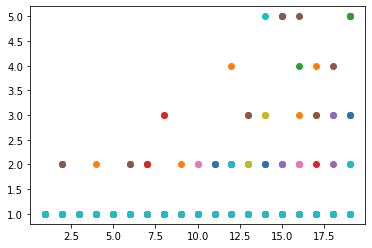

In [7]:
#상태수
def aveE(b,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(1,n-1)
        j=random.random()
        ni=states[i]+i-1
        if ni<2:
            if j>0.5:
                nf=states[i]+i
            elif j<0.5:
                nf=states[i]+i-1
        elif ni>=2:
            if j>0.5:
                nf=states[i]+i
            elif j<0.5:
                nf=states[i]+i-2
        Ei=ni**2
        Ef=nf**2
        DE=Ef-Ei
        if DE <= 0:
            states[i]=states[i]-1
        elif random.random()<np.exp(-b*DE):
            states[i]=states[i]+1
        if states[i]==0:
            states[i]=1
    return states
temp=np.arange(1,20,1)
y=[aveE(1/t,1000) for t in temp]
plt.plot(temp,y,'o')

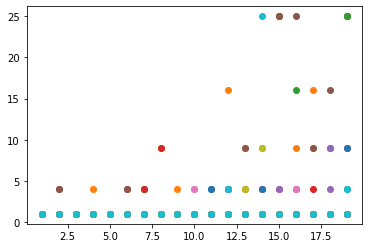

In [8]:
#에너지준위
def z(list):
    return [i*i for i in list]
plt.plot(temp,z(y),'o')

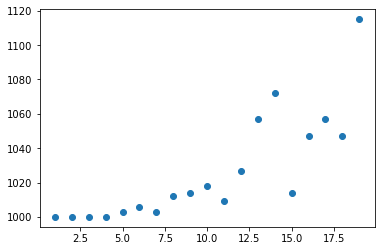

In [9]:
#에너지총합
temp= np.arange(1,20,1)
Et = [sum(aveE(1/t,1000)**2) for t in temp]
plt.plot(temp,Et,'o')

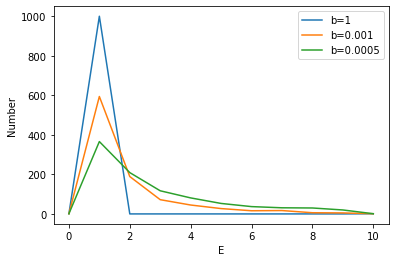

In [11]:
#볼츠만분포
def boltz(b,n): 
    ct=aveE(b,n)
    nb = np.ones(11)
    for t in range(1,10):
        nb[t]=np.count_nonzero(ct == t)
    return nb
plt.plot(boltz(1,1000),label='b=1')
plt.plot(boltz(0.001,1000),label='b=0.001')
plt.plot(boltz(0.0005,1000),label='b=0.0005')
plt.legend()

plt.xlabel("E")
plt.ylabel('Number')
plt.show()